*see*: https://www.youtube.com/watch?v=r0s4slGHwzE&list=PLeo1K3hjS3uvMADnFjV1yg6E5nVU4kOob&index=1

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# print(pd.__version__)

# location = 'VOC_tiny.csv'
location = 'VOC_snippet.csv'

# df = pd.read_csv(location, parse_dates=['Iso8601Time'], index_col='Iso8601Time')
df = pd.read_csv(location, parse_dates=['Iso8601Time'])

# NB: changed at 02:00:00 Local
# df = df.loc[922920:922928]

df.head(6)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097796 entries, 0 to 1097795
Data columns (total 2 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Iso8601Time                1097796 non-null  object
 1   3579.feed_161522.tvoc_ch0  1097796 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.8+ MB


In [72]:
print(type(df['Iso8601Time'][922925]))
my_dts = pd.to_datetime(df['Iso8601Time'][922924:922926])
# my_dts = pd.to_datetime(df['Iso8601Time'][922924:922926], utc=True)
# type(df['Iso8601Time'][0])
my_dts

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 1

In [52]:
# Convert from object (a Series of strings) to datetime64
# NB...ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 922925
# df['Iso8601Time'] = pd.to_datetime(df['Iso8601Time'])

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 922925

In [51]:
# see: https://tuesday.tips/posts/tuesday-tip-7-time-zones-and-daylight-savings-time-in-pandas

# UTC_times = df['Iso8601Time'].dt.tz_localize('UTC')
# TypeError: Already tz-aware, use tz_convert to convert.
print('Entered as US/Eastern')
print(df['Iso8601Time'])
df['Iso8601Time'] = df['Iso8601Time'].dt.tz_convert('UTC')
print('Converted to UTC')
print(df['Iso8601Time'])
# new_zone_1 = 'Europe/Paris'
# df['Iso8601Time'] = df['Iso8601Time'].dt.tz_convert(new_zone_1)
# print('Converted to ', new_zone_1)
# print(df['Iso8601Time'].head(3))
# new_zone_2 = 'America/New_York'
# df['Iso8601Time'] = df['Iso8601Time'].dt.tz_convert(new_zone_2)
# print('Converted to ', new_zone_2)
# print(df['Iso8601Time'].head(3))
# new_zone_3 = 'Asia/Tokyo'
# df['Iso8601Time'] = df['Iso8601Time'].dt.tz_convert(new_zone_3)
# print('Converted to ', new_zone_3)
# print(df['Iso8601Time'].head(3))
print('+++++++++++++++')

Entered as US/Eastern
0          2023-10-25 04:57:47.081000-04:00
1          2023-10-25 04:57:48.081000-04:00
2          2023-10-25 04:57:49.080000-04:00
3          2023-10-25 04:57:50.080000-04:00
4          2023-10-25 04:57:51.081000-04:00
                         ...               
1097791    2023-11-07 01:43:44.406000-05:00
1097792    2023-11-07 01:43:45.406000-05:00
1097793    2023-11-07 01:43:46.406000-05:00
1097794    2023-11-07 01:43:47.406000-05:00
1097795    2023-11-07 01:43:48.406000-05:00
Name: Iso8601Time, Length: 1097796, dtype: object


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# type(df.Iso8601Time[0])
# # pandas._libs.tslibs.timestamps.Timestamp

# df.index
# dtype='datetime64[ns, UTC-04:00]', name='Iso8601Time', length=2733, freq=None)

# type(df.index)
# # pandas.core.indexes.datetimes.DatetimeIndex

In [46]:
# Slice data...
# NB: https://stackoverflow.com/questions/74282056/pandas-extracting-values-from-a-datetimeindex
df.loc["2023-10-25 04:57":"2023-10-25 04:59", ['3579.feed_161522.tvoc_ch0']].mean()

3579.feed_161522.tvoc_ch0    58.789474
dtype: float64

In [50]:
df['3579.feed_161522.tvoc_ch0'].resample('S').mean()

/var/folders/pr/q674sh7s05q_ymjj752fz9qr0000gn/T/ipykernel_46020/3353683505.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['3579.feed_161522.tvoc_ch0'].resample('S').mean()


Iso8601Time
2023-10-25 04:57:47-04:00    65.0
2023-10-25 04:57:48-04:00    48.0
2023-10-25 04:57:49-04:00    57.0
2023-10-25 04:57:50-04:00    40.0
2023-10-25 04:57:51-04:00    67.0
                             ... 
2023-10-25 05:43:15-04:00    38.0
2023-10-25 05:43:16-04:00    55.0
2023-10-25 05:43:17-04:00    49.0
2023-10-25 05:43:18-04:00    39.0
2023-10-25 05:43:19-04:00    39.0
Freq: s, Name: 3579.feed_161522.tvoc_ch0, Length: 2733, dtype: float64

<Axes: xlabel='Iso8601Time'>

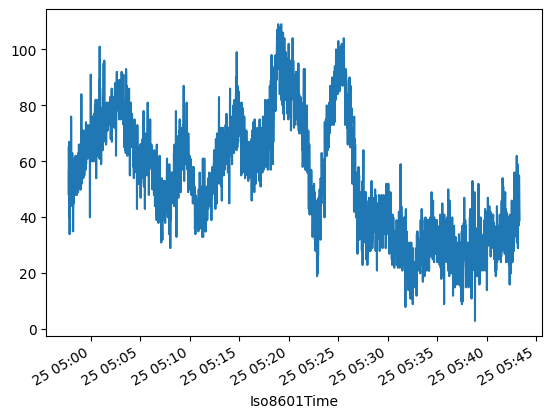

In [61]:
df['3579.feed_161522.tvoc_ch0'].plot()
# df['3579.feed_161522.tvoc_ch0'].resample('S').median().plot()
# df['3579.feed_161522.tvoc_ch0'].resample('S').median().plot(kind='bar')

In [5]:
mydate = '2023-03-15'
print(mydate, ' - ', type(mydate))
mynewdate = pd.to_datetime(mydate)
print(mynewdate, ' - ', type(mynewdate))
UTC_times = mynewdate.dt.localize('UTC')
# print(mynewerdate, ' - ', type(mynewerdate))

2023-03-15  -  <class 'str'>
2023-03-15 00:00:00  -  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


AttributeError: 'Timestamp' object has no attribute 'dt'